In [2]:
# 创造合成数据集
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(
    n_samples=10000, n_features=100, n_classes=4, n_clusters_per_class=4, random_state=1024, n_informative=8,
)
X.shape, y.shape
xy = np.concatenate((X, y.reshape(-1, 1)), axis=1)
np.savetxt("synthetic_dataset.csv", xy, delimiter=",")

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import time  # 导入时间模块

# 加载数据
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
X = xy[:, :-1]
y_true = xy[:, -1].astype(int)

# 创建并训练 KMeans 模型
model = KMeans(n_clusters=4, verbose=1, max_iter=50, tol=0.001, init='k-means++')

start_time = time.perf_counter()
model.fit(X)
end_time = time.perf_counter()

# 获取聚类标签
labels = model.labels_

# 将聚类标签保存到文件中
np.savetxt("cluster_labels_py.csv", labels, delimiter=",", fmt="%d")

# 计算最佳匹配精度
def compute_best_matching_accuracy(y_true, y_pred):
    # 计算混淆矩阵
    contingency = contingency_matrix(y_true, y_pred)
    # 找到每行（真实标签）对应的最大列（聚类标签）
    mapping = {true_label: pred_label for true_label, pred_label in enumerate(np.argmax(contingency, axis=1))}
    # 根据映射计算匹配的样本数
    matched = sum(1 for true, pred in zip(y_true, y_pred) if mapping[true] == pred)
    return matched / len(y_true)

accuracy = compute_best_matching_accuracy(y_true, labels)

print("聚类结果已保存到 cluster_labels_py.csv 文件中")
print("聚类耗时：{:.6f} 毫秒".format((end_time - start_time) * 1000))
print("聚类最佳匹配精度：{:.4f}".format(accuracy))

Initialization complete
Iteration 0, inertia 2141190.206191191.
Iteration 1, inertia 1230130.3218116015.
Iteration 2, inertia 1212813.3994271504.
Iteration 3, inertia 1209265.7608686837.
Iteration 4, inertia 1207931.7482297628.
Iteration 5, inertia 1206721.8063167753.
Iteration 6, inertia 1205376.1771197487.
Iteration 7, inertia 1203736.979913501.
Iteration 8, inertia 1201894.2718490297.
Iteration 9, inertia 1200485.6482685828.
Iteration 10, inertia 1199579.2861896604.
Iteration 11, inertia 1199080.1328603479.
Iteration 12, inertia 1198792.6355747008.
Iteration 13, inertia 1198604.3298412845.
Iteration 14, inertia 1198471.437448309.
Iteration 15, inertia 1198385.2803329928.
Iteration 16, inertia 1198355.0362579604.
Iteration 17, inertia 1198338.1072438671.
Iteration 18, inertia 1198326.007992085.
Iteration 19, inertia 1198319.7194269549.
Iteration 20, inertia 1198314.0465685343.
Iteration 21, inertia 1198308.213965848.
Iteration 22, inertia 1198303.240003777.
Converged at iteration 22:

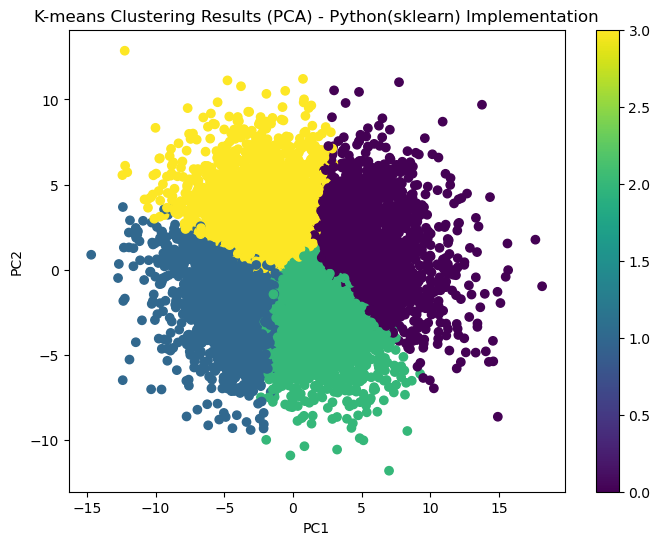

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载原始数据和聚类标签
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
labels = np.loadtxt("cluster_labels_py.csv")

# 提取特征
X = xy[:, :-1]

# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results (PCA) - Python(sklearn) Implementation')
plt.show()

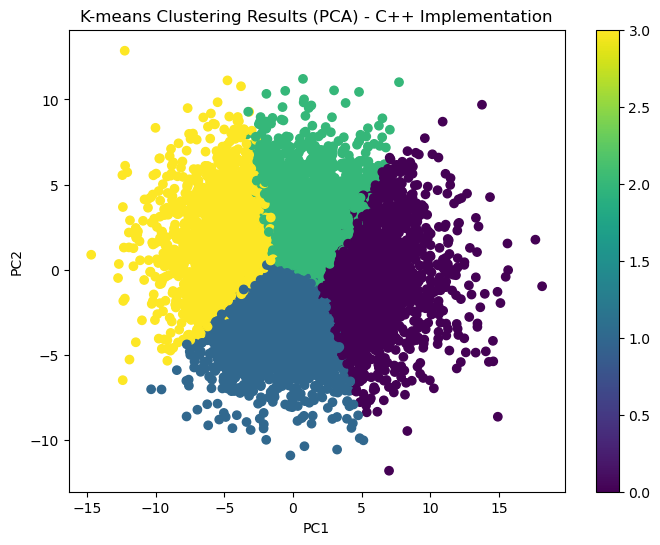

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载原始数据和聚类标签
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
labels = np.loadtxt("cluster_labels_cpp.csv")

# 提取特征
X = xy[:, :-1]

# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results (PCA) - C++ Implementation')
plt.show()

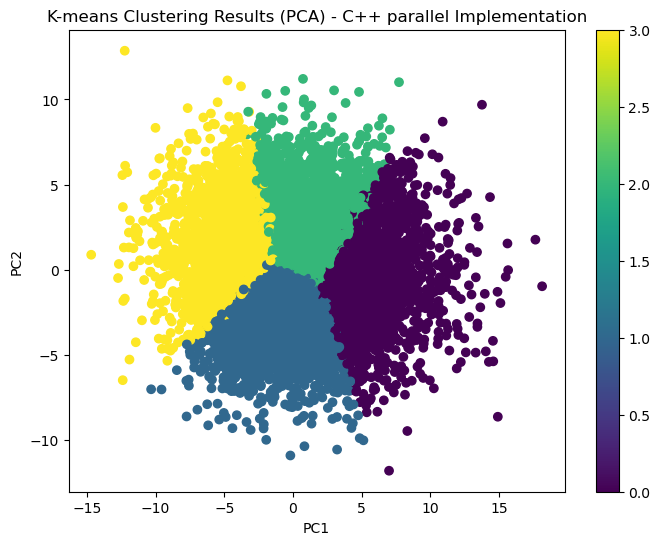

In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载原始数据和聚类标签
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
labels = np.loadtxt("cluster_labels_parallel_cpp.csv")

# 提取特征
X = xy[:, :-1]

# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results (PCA) - C++ parallel Implementation')
plt.show()